# 강의 9주차 인공지능개론

In [538]:
import numpy as np
import matplotlib.pylab as plt

In [539]:
#시그모이드 활성화 함수
def sigmoid(x):
    return 1 / 1 + np.exp(-x)

### 순전파 흐름 ▽
1. 입력 x값
2. 가중치 w값
3. 편향 b값
4. y = np.dot(x, w) + b

In [540]:
x = np.random.rand(2)
print(x)

w = np.random.rand(2, 3)
print(w)

b = np.random.rand(3)
print(b)

y = np.dot(x, w) + b
print(y)

print(x.shape, ' x ',w.shape, ' + ',b.shape, ' = ',y.shape)

[0.9531788  0.25671633]
[[0.42492413 0.66099088 0.33818395]
 [0.49112389 0.30588661 0.50163431]]
[0.91613382 0.39779301 0.48729946]
[1.44724203 1.10636159 0.93842696]
(2,)  x  (2, 3)  +  (3,)  =  (3,)


----
### 순전파 흐름 그래프

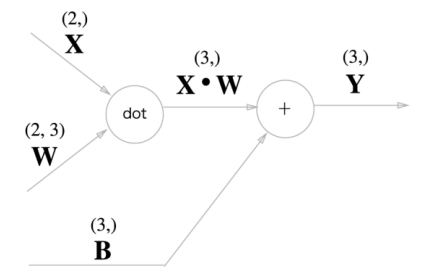

----
### 역전파 흐름 그래프
- 덧셈 노드의 역전파는 미분이 1이기에 그대로 보냄
- 곱셉 노드의 역전파는 미분이 대응하는 원소

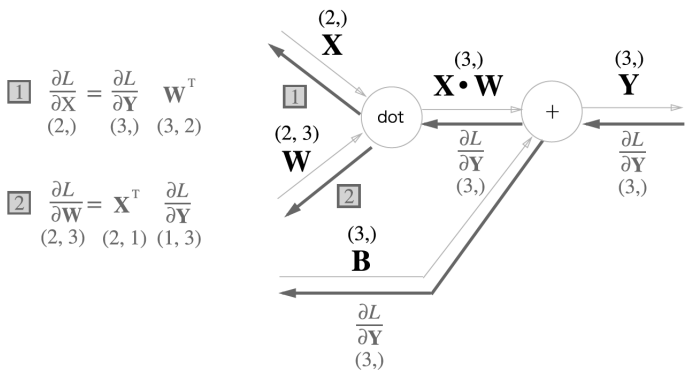

In [541]:
x = np.random.rand(2)
print("x : ", x)

w = np.random.rand(2, 3)
print("w : ", w)

b = np.random.rand(3)
print("b : ", b)

xw = np.dot(x, w)
y = xw + b
print("y : ", y)

print(x.shape, ' x ',w.shape, ' + ',b.shape, ' = ',y.shape)

x :  [0.32527602 0.14962062]
w :  [[0.29273888 0.40286714 0.57837329]
 [0.12640808 0.02430014 0.39727107]]
b :  [0.78201089 0.84157826 0.93866212]
y :  [0.89614508 0.97625708 1.18623302]
(2,)  x  (2, 3)  +  (3,)  =  (3,)


### 역전파 해보기
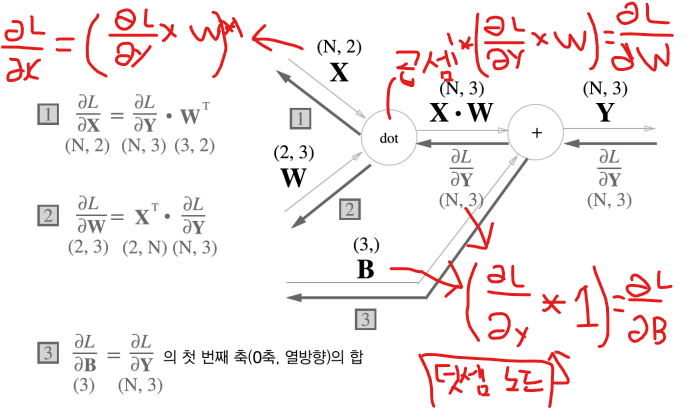

In [542]:
# 가상의 손실 함수값
cross = np.random.rand(3)
cross

array([0.44728219, 0.30406049, 0.54252038])

In [543]:
# aL / aY
back = cross / y
back

array([0.49911806, 0.31145535, 0.45734722])

x * w 부분과
편향은 덧셈 노드라 그대로 L / b가 됨

In [544]:
# 덧셈 노드는 미분이 0이라 그대로 흐름
back_b = back * 1
back_xw = back * 1
back_b

array([0.49911806, 0.31145535, 0.45734722])

np.dot은 곱셈 노드로 대응하는 원소의 곱이 된다

### 곱셈 노드는 행렬의 차원 수를 일치시켜야함
- 아래는 행렬 차원 수를 일치하지 않아 오류가 발생

In [545]:
print("x에 대한 역전파 " ,back_xw.shape, ' x ', w.shape)
print("w에 대한 역전파 " ,back_xw.shape, ' x ', x.shape)

x에 대한 역전파  (3,)  x  (2, 3)
w에 대한 역전파  (3,)  x  (2,)


In [546]:
back_xw_x = back_xw.copy()
print("x에 대한 역전파 XW * W" ,back_xw_x.shape, ' x ', w.shape)

back_x = w * back_xw_x
print(back_x)

x에 대한 역전파 XW * W (3,)  x  (2, 3)
[[0.14611126 0.12547512 0.26451742]
 [0.06309256 0.00756841 0.18169082]]


In [547]:
back_xw_w = back_xw.copy()
back_xw_w = np.reshape(back_xw_w, (3, 1))
x = np.reshape(x, (1, 2))
print("w에 대한 역전파 XW * X" ,back_xw_w.shape, ' x ', x.shape)

back_w = np.dot(back_xw_w, x)
print(back_w)

w에 대한 역전파 XW * X (3, 1)  x  (1, 2)
[[0.16235113 0.07467835]
 [0.10130896 0.04660014]
 [0.14876408 0.06842858]]


In [548]:
print(back_xw_x.shape, ' x ', x.shape)
print(back_xw_w.shape, ' x ', w.shape)

(3,)  x  (1, 2)
(3, 1)  x  (2, 3)


In [549]:
back_x = back_xw_x * w *  1
back_w = back_xw_w * x *  1

In [550]:
print("aL / aX")
print(back_x)

aL / aX
[[0.14611126 0.12547512 0.26451742]
 [0.06309256 0.00756841 0.18169082]]


In [551]:
print("aL / aW")
print(back_w)

aL / aW
[[0.16235113 0.07467835]
 [0.10130896 0.04660014]
 [0.14876408 0.06842858]]


# 실습 내용

##### 덧셈에 대한 순전파

In [552]:
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
Y = X_dot_W + B
print(Y)

[[ 1  2  3]
 [11 12 13]]


##### 위 덧셈에 대한 역전파
##### 덧셈 노드에서 기존 편향 행렬 차원의 수를 맞추기 위해 axis를 이용하여 차원을 조절함

In [553]:
dY = Y
print(dY, '\n\n')
dB = np.sum(dY, axis = 0)
print(dB)

[[ 1  2  3]
 [11 12 13]] 


[12 14 16]


## 역전파의 구조를 만들어두면 출력값만 넣었을 때 바로 입력에 대해서 역전파를 구할 수 있음
- 즉 순전파의 구조에 맞게 역전파 구조를 만들고, 오차역전파법을 이용하여 가중치를 조절한다

In [599]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        
        dout = dout.reshape(-1, dout.shape[0])
        x = self.x.T.reshape(self.x.T.shape[0], -1)
        print("np.dot(x, dout) = ",  x.shape," * ", dout.shape)
        print("np.sum(dout, axis=0) = ", dout.shape)
        
        self.dW = np.dot(x, dout)
        self.db = np.sum(dout, axis=0)
        return dx

* 각 x, w, b로 순전파를 진행

In [600]:
x = np.random.rand(2)
w = np.random.rand(2, 3)
b = np.random.rand(3)

af = Affine(w, b)
out = af.forward(x)

print(af.x)
print()
print(af.W)
print()
print(af.b)

[0.99638685 0.05120904]

[[0.76170311 0.97803158 0.85787354]
 [0.51178584 0.15059227 0.90979617]]

[0.420763   0.30779774 0.76664588]


* 출력값으로 역전파를 진행

In [601]:
af.backward(out)

np.dot(x, dout) =  (2, 1)  *  (1, 3)
np.sum(dout, axis=0) =  (1, 3)


array([3.61116364, 2.32898767])

In [602]:
print(af.dW)
print()
print(af.db)

[[1.20156485 1.28534625 1.66198282]
 [0.06175411 0.06606003 0.08541717]]

[1.20592202 1.29000723 1.66800959]


In [604]:
class SoftmaxWithLoss:
    def __init_(self):
        self.y = None # softmax
        self.t = None # 정답
        self.loss = None #손실
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size
        return dx
